### Load Data

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image

csv_path, csv_test_path = "../../data/train.csv", "../../data/test.csv"
img_dir, img_dir_test = "../../data/train_ims", "../../data/test_ims"

data_train = pd.read_csv(csv_path)
print(data_train)
data_test = pd.read_csv(csv_test_path)

X_train, y_train, X_test, y_test = [], [], [], []

for _, row in data_train.iterrows():
    img_path = os.path.join(img_dir, row.iloc[0])
    label = int(row.iloc[1])
    img = Image.open(img_path).convert("RGB")
    img = np.array(img).flatten()
    X_train.append(img)
    y_train.append(label)

for _, row in data_test.iterrows():
    img_path = os.path.join(img_dir_test, row.iloc[0])
    label = int(row.iloc[1])
    img = Image.open(img_path).convert("RGB")
    img = np.array(img).flatten()
    X_test.append(img)
    y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

           im_name  label
0      000231c.jpg      2
1      0002574.jpg      5
2      00027d5.jpg      7
3      000304e.jpg      3
4      00047fc.jpg      7
...            ...    ...
49995  d507197.jpg      5
49996  d508429.jpg      1
49997  d508cb7.jpg      9
49998  d509167.jpg      3
49999  d509c42.jpg      3

[50000 rows x 2 columns]


### Global Parameters

In [2]:
SEED = 42

### Size of dataset

In [3]:
print("The shape of the training set (after flatten 3 * 32 * 32): ", X_train.shape)
print("The shape of the testing set (after flatten 3 * 32 * 32): ", X_test.shape)
print("The size of the label of the training set: ", y_train.shape)
print("The size of the label of the test set: ", y_test.shape)

The shape of the training set (after flatten 3 * 32 * 32):  (50000, 3072)
The shape of the testing set (after flatten 3 * 32 * 32):  (10000, 3072)
The size of the label of the training set:  (50000,)
The size of the label of the test set:  (10000,)


### Calculate the number of the labels of each class

In [4]:
# Count the labels
count_labels = np.unique(y_train, return_counts=True)

# Create DataFrame
label_counts_df = pd.DataFrame({
    "Label": count_labels[0],
    "Count": count_labels[1]
}).set_index("Label")

# Print DataFrame
print("Count of each label:")
print(label_counts_df)

Count of each label:
       Count
Label       
0       5038
1       5016
2       5032
3       4991
4       4982
5       4967
6       4985
7       4998
8       5002
9       4989


### Draw Counts

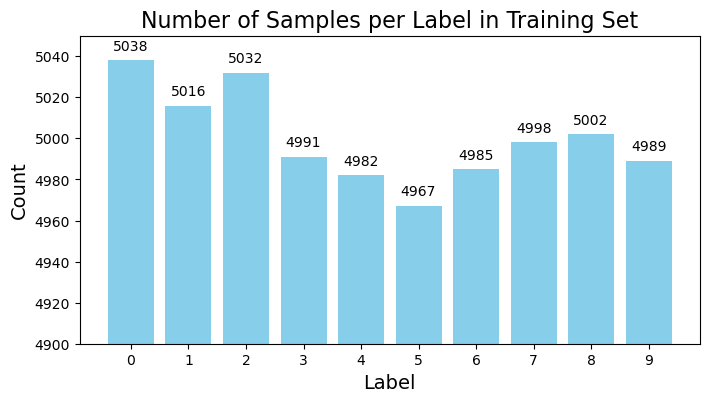

In [5]:
import matplotlib.pyplot as plt

unique_labels = np.unique(y_train)

plt.figure(figsize=(8, 4))
plt.bar(count_labels[0], count_labels[1], color='skyblue')
plt.title("Number of Samples per Label in Training Set", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.ylim([4900, 5050])
plt.xticks(unique_labels)

for i, count in enumerate(count_labels[1]):
    plt.text(count_labels[0][i], count + 5, str(count), ha='center', fontsize=10)

plt.show()

In [6]:
print("Other Statistics for the training set:")
print(pd.Series(y_train).describe())

Other Statistics for the training set:
count    50000.00000
mean         4.49258
std          2.87539
min          0.00000
25%          2.00000
50%          4.00000
75%          7.00000
max          9.00000
dtype: float64


### Visualization_html

In [7]:
from IPython.core.display import HTML

# Count the labels
count_labels = np.unique(y_train, return_counts=True)

# Create DataFrame
label_counts_df = pd.DataFrame({
    "Label": count_labels[0],
    "Count": count_labels[1]
}).set_index("Label")

# Add a column for example images
def get_example_images(label, num_examples=10):
    indices = np.where(y_train == label)[0]
    selected_indices = np.random.choice(indices, size=min(num_examples, len(indices)), replace=False)
    example_images = [os.path.join(img_dir, data_train.iloc[i, 0]) for i in selected_indices]
    return " ".join([f'<img src="{img}" width="50" />' for img in example_images])

label_counts_df["Example Images"] = label_counts_df.index.map(get_example_images)

# Display the DataFrame with images
HTML(label_counts_df.to_html(escape=False))

,Count,Example Images
Label,,
0,5038,
1,5016,
2,5032,
3,4991,
4,4982,
5,4967,
6,4985,
7,4998,
8,5002,


### Visualization_plt

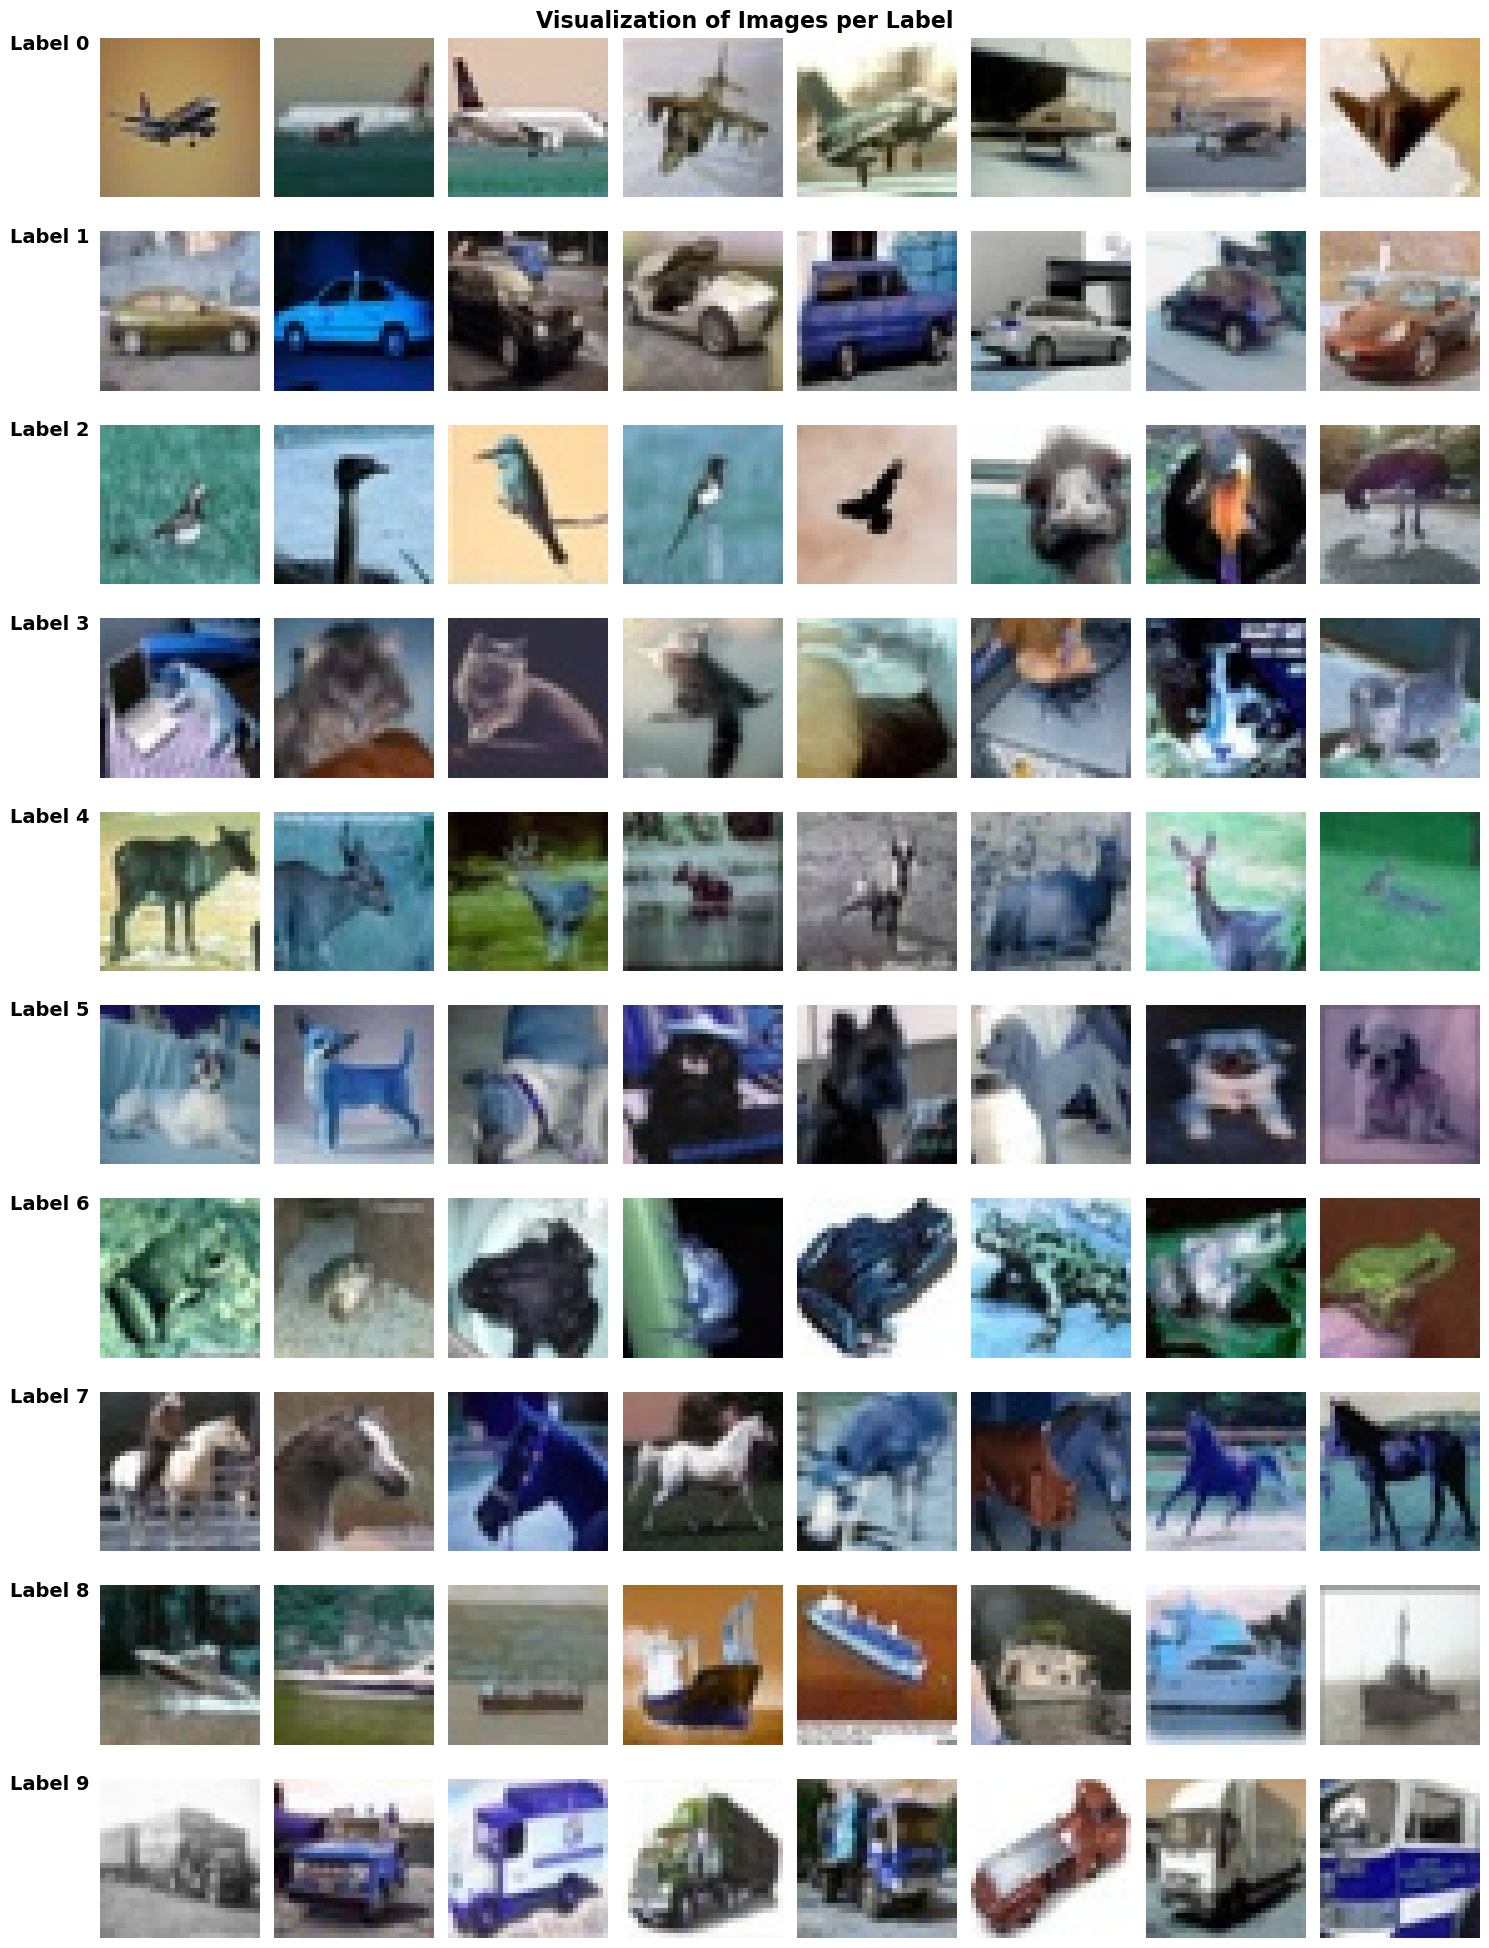

In [8]:
def visualize_images_by_label(img_dir, data, y, num_images=8):
    unique_labels = np.unique(y)  # Get all unique labels
    num_labels = len(unique_labels)  # Number of labels

    # Create a grid layout
    fig, axes = plt.subplots(num_labels, num_images, figsize=(15, num_labels * 2))
    fig.subplots_adjust(top=0.95)  # Adjust the top margin for the title
    fig.suptitle("Visualization of Images per Label", fontsize=16, fontweight='bold')  # Add title above the grid

    for i, label in enumerate(unique_labels):
        # Get indices corresponding to the current label
        indices = np.where(y == label)[0]
        # Randomly select num_images indices
        selected_indices = np.random.choice(indices, size=min(num_images, len(indices)), replace=False)

        for j, idx in enumerate(selected_indices):
            # Get the image path
            img_path = os.path.join(img_dir, data.iloc[idx, 0])
            # Open the image
            img = Image.open(img_path)

            # Display the image
            ax = axes[i, j] if num_labels > 1 else axes[j]  # Handle single-row case
            ax.imshow(img)
            ax.axis("off")  # Hide axes

        # Add label annotation to the first column of each row
        axes[i, 0].annotate(
            f"Label {label}",
            xy=(0, 0.5),
            xytext=(-axes[i, 0].yaxis.labelpad - 5, 0),
            textcoords="offset points",
            ha="right",
            va="center",
            fontsize=14,
            fontweight='bold',
            rotation=0,
        )

    plt.tight_layout()
    plt.show()

visualize_images_by_label(img_dir, data_train, y_train)



### Split the data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)
# del X_train_aug, y_train_aug
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_val.shape)

X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the images
X_val = X_val.reshape(X_val.shape[0], -1)  # Flatten the images
print("Flattened training set shape:", X_train.shape)
print("Flattened testing set shape:", X_val.shape)

Training set shape: (40000, 3072)
Testing set shape: (10000, 3072)
Training labels shape: (40000,)
Testing labels shape: (10000,)
Flattened training set shape: (40000, 3072)
Flattened testing set shape: (10000, 3072)


### Data Augmentation

In [10]:
import numpy as np
from PIL import Image, ImageEnhance
import random

def random_crop(image, crop_size):
    """
    Randomly crop the image to the specified size.

    Parameters:
        image (PIL.Image): Input image.
        crop_size (int): Size of the cropped image.

    Returns:
        PIL.Image: Cropped image.
    """
    width, height = image.size
    left = random.randint(0, width - crop_size)
    upper = random.randint(0, height - crop_size)
    right = left + crop_size
    lower = upper + crop_size
    return image.crop((left, upper, right, lower))

def random_rotation(image, max_angle=30):
    """
    Randomly rotate the image within a specified angle range.

    Parameters:
        image (PIL.Image): Input image.
        max_angle (int): Maximum rotation angle in degrees.

    Returns:
        PIL.Image: Rotated image.
    """
    angle = random.randint(-max_angle, max_angle)
    return image.rotate(angle)

def color_jitter(image, brightness=0.2, contrast=0.2, color=0.2):
    """
    Apply random color jittering to the image.

    Parameters:
        image (PIL.Image): Input image.
        brightness (float): Brightness adjustment factor range (e.g., 0.2 means [0.8, 1.2]).
        contrast (float): Contrast adjustment factor range.
        color (float): Color adjustment factor range.

    Returns:
        PIL.Image: Color-jittered image.
    """
    # Adjust brightness
    enhancer = ImageEnhance.Brightness(image)
    factor = random.uniform(1 - brightness, 1 + brightness)
    image = enhancer.enhance(factor)

    # Adjust contrast
    enhancer = ImageEnhance.Contrast(image)
    factor = random.uniform(1 - contrast, 1 + contrast)
    image = enhancer.enhance(factor)

    # Adjust color
    enhancer = ImageEnhance.Color(image)
    factor = random.uniform(1 - color, 1 + color)
    image = enhancer.enhance(factor)

    return image

def aug_data(X, y, seed=None):
    """
    Augment the data by applying random cropping, random rotation, horizontal flipping, and color jittering.
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    X_aug = []
    y_aug = []
    
    p_rotation = 0.05
    p_crop = 0.05
    p_jitter = 0.05

    for i in range(len(X)):
        # Reshape to original image shape (H, W, C)
        img = X[i].reshape(32, 32, 3)  # Assuming original image size is 32x32 and 3 channels
        label = y[i]

        # Convert to PIL Image for easier augmentation
        pil_img = Image.fromarray(img)

        # print(np.array(pil_img).shape)
        # Append original image
        X_aug.append(np.array(pil_img).flatten())
        y_aug.append(label)

        # Apply augmentations
        # Horizontal flip
        flipped_img = pil_img.transpose(Image.FLIP_LEFT_RIGHT)
        X_aug.append(np.array(flipped_img).flatten())
        y_aug.append(label)

        # Random crop
        if random.random() < p_rotation:
            crop_size = random.randint(24, 32)  # Random crop size between 24x24 and 32x32
            cropped_img = random_crop(pil_img, crop_size).resize((32, 32))
            X_aug.append(np.array(cropped_img).flatten())
            y_aug.append(label)

        # Random rotation
        if random.random() < p_crop:
            rotated_img = random_rotation(pil_img).resize((32, 32))
            X_aug.append(np.array(rotated_img).flatten())
            y_aug.append(label)

        # Color jittering
        if random.random() < p_jitter:
            jittered_img = color_jitter(pil_img)
            X_aug.append(np.array(jittered_img).flatten())
            y_aug.append(label)


    return np.array(X_aug), np.array(y_aug)

# Example usage
# X_train_aug, y_train_aug = aug_data(X_train, y_train, SEED)

### Data after augmentation

In [11]:
X_train_aug, y_train_aug = aug_data(X_train, y_train, SEED)
del X_train, y_train
# Print the shapes of the augmented data
print("Augmented training set shape: ", X_train_aug.shape)
print("Augmented training set labels shape: ", y_train_aug.shape)
# Count the labels
count_labels = np.unique(y_train_aug, return_counts=True)
# Create DataFrame
label_counts_df = pd.DataFrame({
    "Label": count_labels[0],
    "Count": count_labels[1]
}).set_index("Label")
# Print DataFrame
print("Count of each label in augmented training set:")
print(label_counts_df)

Augmented training set shape:  (85819, 3072)
Augmented training set labels shape:  (85819,)
Count of each label in augmented training set:
       Count
Label       
0       8662
1       8509
2       8691
3       8575
4       8618
5       8547
6       8479
7       8623
8       8595
9       8520


### Resize

In [12]:
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.metrics import accuracy_score 
from tqdm import tqdm
import cv2

def resize_images(images, target_size=(128, 128)):
    """
    Resize a list or array of images to the target size.

    Parameters:
        images (numpy.ndarray): Input images, shape (N, H, W, C) or (N, H*W*C).
        target_size (tuple): Target size (width, height), default is (128, 128).

    Returns:
        numpy.ndarray: Resized images, shape (N, target_size[1], target_size[0], C).
    """
    resized_images = []
    for img in images:
        # If the image is flattened, reshape it to (H, W, C)
        if len(img.shape) == 1:
            img = img.reshape(32, 32, 3)  # Adjust this based on your original image shape

        # Resize the image
        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)
        resized_images.append(resized_img)

    return np.array(resized_images)

# X_train_aug_resized = resize_images(X_train_aug, target_size=(128, 128))
# print("Resized images shape:", X_train_aug_resized.shape)

### Extract original data

In [13]:
def image_statistics_extractor(image):
    """
    Extract statistical features from the original image.

    Parameters:
        image (numpy.ndarray): Input image, shape (H, W, C) or (H*W*C).

    Returns:
        numpy.ndarray: Statistical feature vector for the input image.
    """
    # If the image is flattened, reshape it to (H, W, C)
    if len(image.shape) == 1:
        image = image.reshape(32, 32, 3)  # Adjust this based on your original image shape

    resized_image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_CUBIC)

    return resized_image.flatten()
    

### SIFT

In [14]:
import cv2
import numpy as np

def SIFT_extractor(image, n_features=128):
    """
    Extract SIFT features from a single image.

    Parameters:
        image (numpy.ndarray): Input image, shape (H, W, C) or (H*W*C).

    Returns:
        numpy.ndarray: SIFT descriptors for the input image. If no descriptors are found, returns an empty array.
    """
    sift = cv2.SIFT_create()

    if not isinstance(image, np.ndarray):
        image = np.array(image)

    if len(image.shape) == 1:
        image = image.reshape(32, 32, 3) 
        
    # Convert to grayscale
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # # Detect keypoints and compute descriptors
    # keypoints, descriptors = sift.detectAndCompute(gray, None)
    # if descriptors is None:
    #         return np.zeros((1, n_features)).flatten()
    
    channels = cv2.split(image)
    descriptors_list = []
    
    for channel in channels:
        keypoints, descriptors = sift.detectAndCompute(channel, None)
        # If no descriptors are found, return an empty array
        if descriptors is None:
            descriptors = np.zeros((1, n_features)).flatten()
        descriptors_mean = np.mean(descriptors, axis=0)
        descriptors_list.append(descriptors_mean)
        
    combined_descriptors = np.concatenate(descriptors_list)

    return combined_descriptors

### HOG

In [15]:
from skimage.feature import hog
import cv2
import numpy as np

def HOG_extractor(image, target_size=(128, 128)):
    """
    Extract HOG features from a single image.

    Parameters:
        image (numpy.ndarray): Input image, shape (H, W, C) or (H*W*C).
        target_size (tuple): Target size to resize the image before extracting HOG features.

    Returns:
        numpy.ndarray: Flattened HOG feature vector for the input image.
    """
    # If the image is flattened, reshape it to (H, W, C)
    if len(image.shape) == 1:
        image = image.reshape(32, 32, 3)  # Adjust this based on your original image shape
    
    # Resize the image to the target size
    resized_img = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)

    # # Convert to grayscale (HOG works on single-channel images)
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
    # print("Gray image shape:", gray_img.shape)


    # Split the image into three channels (R, G, B)
    channels = cv2.split(resized_img)
    # print("Channels shape:", [channel.shape for channel in channels])

    # Compute HOG features
    hog_kwargs = {
        "_winSize": (128, 128),
        "_blockSize": (64, 64),
        "_blockStride": (16, 16),
        "_cellSize": (16, 16),
        "_nbins": 10,
        "_derivAperture": 1,
        "_winSigma": -1,
        "_histogramNormType": 0,
        "_L2HysThreshold": 0.2,
        "_gammaCorrection": True,
        "_nlevels": 64,
        "_signedGradient": True
    }   

    hog = cv2.HOGDescriptor(**hog_kwargs)

    # Compute HOG features
    hog_features = []
    for channel in channels:
        # Compute HOG features for the current channel
        hog_feature = hog.compute(channel)
        # print ("HOG feature shape:", hog_feature.shape)
        hog_features.append(hog_feature.flatten())
    
    # gray_hog_feature = hog.compute(gray_img)
    # hog_features.append(gray_hog_feature.flatten())
    # print ("Gray HOG feature shape:", gray_hog_feature.shape)

    # Flatten the HOG feature vector
    return np.concatenate(hog_features)

### EOG

In [16]:
def EOG_extractor(image, target_size=(32, 32)):
    """
    Extract Edge Orientation Gradient (EOG) features from a single image.

    Parameters:
        image (numpy.ndarray): Input image, shape (H, W, C) or (H*W*C).
        target_size (tuple): Target size to resize the image before extracting EOG features.

    Returns:
        numpy.ndarray: Flattened EOG feature vector for the input image.
    """
    if len(image.shape) == 1:
        image = image.reshape(32, 32, 3)
        
    # Resize the image to the target size
    resized_img = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    ###############################GRAY###############################
    # Convert to grayscale
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
    # Apply Canny edge detection
    edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)
    # Compute gradients in x and y directions
    grad_x = cv2.Sobel(edges, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(edges, cv2.CV_64F, 0, 1, ksize=3)
    # Compute gradient magnitude and orientation
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    orientation = np.arctan2(grad_y, grad_x)
    # Flatten the magnitude and orientation into a feature vector
    eog_feature = np.concatenate([magnitude.flatten(), orientation.flatten()])
    
    ###############################RGB###############################
    # Split the image into R, G, B channels
    # channels = cv2.split(resized_img)
    # # Initialize a list to store EOG features for each channel
    # eog_features = []
    
    # for channel in channels:
    #     # Apply Canny edge detection
    #     edges = cv2.Canny(channel, threshold1=100, threshold2=200)
    #     # Compute gradients in x and y directions
    #     grad_x = cv2.Sobel(edges, cv2.CV_64F, 1, 0, ksize=3)
    #     grad_y = cv2.Sobel(edges, cv2.CV_64F, 0, 1, ksize=3)
    #     # Compute gradient magnitude and orientation
    #     magnitude = np.sqrt(grad_x**2 + grad_y**2)
    #     orientation = np.arctan2(grad_y, grad_x)
    #     # Flatten the magnitude and orientation and append to the list
    #     eog_features.append(magnitude.flatten())
    #     eog_features.append(orientation.flatten())
    
    # eog_feature = np.concatenate(eog_features)

    return eog_feature

### LBP

In [17]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage.transform import resize

def LBP_extractor(image, target_size=(32, 32)):
    """
    Extract Local Binary Pattern (LBP) features from a single image.

    Parameters:
        image (numpy.ndarray): Input image, shape (H, W, C) or (H*W*C).
        target_size (tuple): Target size to resize the image before extracting LBP features.

    Returns:
        numpy.ndarray: Flattened LBP feature vector for the input image.
    """
    # If the image is flattened, reshape it to (H, W, C)
    if len(image.shape) == 1:
        image = image.reshape(32, 32, 3)  # Adjust this based on your original image shape
    # Resize the image to the target size
    resized_img = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    # Convert to grayscale
    gray_img = rgb2gray(resized_img)
    # Compute LBP features
    lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform')
    # Flatten the LBP feature vector
    return lbp.flatten()

### ORB

In [18]:
def ORB_extractor(image, target_size=(64, 64), n_features=500, fixed_length=2000):
    """
    Extract ORB features from a single image with fixed length.

    Parameters:
        image (numpy.ndarray): Input image, shape (H, W, C) or (H*W*C).
        target_size (tuple): Target size to resize the image before extracting ORB features.
        n_features (int): Maximum number of features to retain.
        fixed_length (int): Fixed length for the ORB feature vector.

    Returns:
        numpy.ndarray: Flattened ORB descriptors with fixed length. If no descriptors are found, returns a zero vector.
    """
    orb = cv2.ORB_create(nfeatures=n_features)

    # If the image is flattened, reshape it to (H, W, C)
    if len(image.shape) == 1:
        image = image.reshape(32, 32, 3)

    # Resize the image to the target size
    resized_img = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    # Convert to grayscale
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)
    # If no descriptors are found, return a zero vector
    if descriptors is None:
        descriptors = np.zeros((1, 32), dtype=np.uint8)
    # Flatten the descriptors
    descriptors = descriptors.flatten()

    # Ensure the feature vector has a fixed length
    if len(descriptors) < fixed_length:
        descriptors = np.pad(descriptors, (0, fixed_length - len(descriptors)), mode='constant')
    elif len(descriptors) > fixed_length:
        descriptors = descriptors[:fixed_length]

    return descriptors.flatten()

### HIST

In [19]:
def HIST_extractor(image, target_size=(64, 64), bins=(8, 8, 8)):
    """
    Extract color histogram (HIST) features from a single image.

    Parameters:
        image (numpy.ndarray): Input image, shape (H, W, C) or (H*W*C).
        target_size (tuple): Target size to resize the image before extracting HIST features.
        bins (tuple): Number of bins for each color channel (e.g., (8, 8, 8)).

    Returns:
        numpy.ndarray: Flattened HIST feature vector for the input image.
    """

    if len(image.shape) == 1:
        image = image.reshape(32, 32, 3)

    # Resize the image to the target size
    resized_img = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
    # Compute the color histogram for each channel (B, G, R)
    hist = cv2.calcHist([resized_img], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    # Normalize the histogram
    hist = cv2.normalize(hist, hist).flatten()

    return hist

### Combine the features

In [20]:
print_flag = False

def combined_feature_extractor(image):
    """
    Extract combined features (HOG, EOG, LBP, ORB, HIST, SIFT) from a single input image.

    Parameters:
        image (numpy.ndarray): Input image, shape (H, W, C) or (H*W*C).

    Returns:
        numpy.ndarray: Combined feature vector for the input image.
    """
    # # Extract features
    # static_features = image_statistics_extractor(image)  # Original image statistics
    # sift_features = SIFT_extractor(image)  # SIFT features
    # hog_features = HOG_extractor(image)   # HOG features
    # eog_features = EOG_extractor(image)   # EOG features
    # lbp_features = LBP_extractor(image)   # LBP features
    # orb_features = ORB_extractor(image)   # ORB features
    # hist_features = HIST_extractor(image) # HIST features

    global print_flag

    # static_features = np.array(image_statistics_extractor(image), dtype=np.float32)
    # sift_features = np.array(SIFT_extractor(image), dtype=np.float32)
    hog_features = np.array(HOG_extractor(image), dtype=np.float32)
    eog_features = np.array(EOG_extractor(image), dtype=np.float32)
    # lbp_features = np.array(LBP_extractor(image))
    orb_features = np.array(ORB_extractor(image), dtype=np.float32)
    hist_features = np.array(HIST_extractor(image), dtype=np.float32)

    # Combine features into a single vector
    combined_features = np.concatenate((
        # static_features,
        # sift_features,
        hog_features,
        eog_features,
        # lbp_features,
        orb_features,
        hist_features
    ))

    # Print feature shapes for debugging
    if print_flag == False:
        # print("Static features shape:", static_features.shape)
        print("HOG features shape:", hog_features.shape)
        print("EOG features shape:", eog_features.shape)
        print("ORB features shape:", orb_features.shape)
        print("HIST features shape:", hist_features.shape)
        # print("SIFT features shape:", sift_features.shape)
        # print("LBP features shape:", lbp_features.shape)
        print_flag = True
    
    # del static_features
    # del sift_features
    del hog_features
    del eog_features
    # del lbp_features
    del orb_features
    del hist_features
    
    # RECORD MANUALLY THE SHAPE OF EACH FEATURE
    # Static features shape: (12288,)
    # HOG features shape: (8100,)
    # EOG features shape: (8192,)
    # ORB features shape: (8000,)
    # HIST features shape: (512,)
    # SIFT features shape: (128,)

    return combined_features

### Convert training set with features

In [21]:
# Extract features from training and validation sets
X_train_features = [combined_feature_extractor(img) for img in tqdm(X_train_aug, desc="Extracting features for X_train", total=len(X_train_aug))]
X_val_features = [combined_feature_extractor(img) for img in tqdm(X_val, desc="Extracting features for X_val", total=len(X_val))]
del X_train_aug, X_val

Extracting features for X_train:   0%|          | 0/85819 [00:00<?, ?it/s]

HOG features shape: (12000,)
EOG features shape: (2048,)
ORB features shape: (2000,)
HIST features shape: (512,)


Extracting features for X_val: 100%|██████████| 10000/10000 [00:13<00:00, 732.94it/s]


In [22]:
X_train_featured = np.array(X_train_features, dtype=np.float32)
X_val_featured = np.array(X_val_features, dtype=np.float32)
del X_train_features, X_val_features

print("X_train_featured shape:", X_train_featured.shape)
print("X_val_featured shape:", X_val_featured.shape)

# Save the features to numpy arrays
# np_path = "../data/nparrays"
# os.makedirs(np_path, exist_ok=True)
# np.save(os.path.join(np_path, "X_train_features5.npy"), X_train_featured)
# np.save(os.path.join(np_path, "X_val_features5.npy"), X_val_featured)

X_train_featured shape: (85819, 16560)
X_val_featured shape: (10000, 16560)


In [23]:
# for i in range(len(X_train_features)):
#     print(f"Image {i} has shape {X_train_features[i].shape}")
# for i in range(len(X_val_features)):
#     print(f"Image {i} has shape {X_val_features[i].shape}")

# del X_train_features
# del X_val_features
# del X_train
# del X_val

print("X_train_featured shape:", X_train_featured.shape)
print("X_val_featured shape:", X_val_featured.shape)

X_train_featured shape: (85819, 16560)
X_val_featured shape: (10000, 16560)


### SVM + PCA

In [24]:
# Accelerate the code using Intel's scikit-learn optimizations
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# garbage collection
import gc
gc.collect()

svm_model = make_pipeline(
    StandardScaler(), 
    PCA(n_components=0.75, random_state=SEED), 
    SVC(C=9, kernel='rbf', gamma='scale',random_state=SEED))

svm_model.fit(X_train_featured, y_train_aug)

y_pred_svm = svm_model.predict(X_val_featured)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"SVM Validation Accuracy: {accuracy_svm:.4f}")

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
# import seaborn as sns
# # Confusion Matrix
# cm = confusion_matrix(y_val, y_pred_svm)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val)) 
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

# Classification Report
report = classification_report(y_val, y_pred_svm)

print("Classification Report:")
print(classification_report(y_val, y_pred_svm))

output_file = "classification_report.txt"

with open(output_file, "w") as f:
    f.write("Classification Report:\n")
    f.write(report)

print(f"Classification report saved to {output_file}")

SVM Validation Accuracy: 0.7792
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1011
           1       0.89      0.87      0.88      1051
           2       0.68      0.70      0.69       985
           3       0.58      0.59      0.58       983
           4       0.74      0.75      0.74       968
           5       0.68      0.64      0.66       975
           6       0.84      0.83      0.83      1022
           7       0.86      0.81      0.84       987
           8       0.85      0.88      0.87       996
           9       0.87      0.86      0.86      1022

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Classification report saved to classification_report.txt


### Predict test data's class

In [26]:
# # from PIL import Image

# X_test_features = []
# X_test_resized = resize_images(X_test)
# for image in X_test_resized:
#     combined_features = combined_feature_extractor(image)
#     X_test_features.append(combined_features)
# X_test_features = np.array(X_test_features)
# print(f"Preprocessed test images shape: {X_test_features.shape}")

# # Predict labels
# y_test_pred = svm_model.predict(X_test_features)

# # Save predictions to CSV
# data_test['label'] = y_test_pred
# submission_file = './submission.csv'
# data_test.to_csv(submission_file, index=False)

# print(f"Predictions saved to {submission_file}")

In [27]:
gc.collect()

0